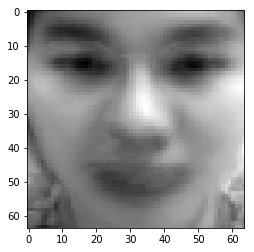

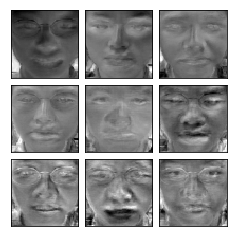

In [16]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#load data
picdata = np.zeros(64*64)

for letter in ['A','B','C','D','E','F','G','H','I','J']:
    for number in ['00','01','02','03','04','05','06','07','08','09']:
        a = Image.open('/home/ranko/Downloads/faceExpressionDatabase/%s%s.bmp' %(letter,number))
        apic = np.zeros((64,64))
        for i in range(64):
            for j in range(64):
                apic[j][i] = a.getpixel((i,j))
        a.close()
        picdata = np.vstack( (picdata, apic.reshape(64*64)) )
picdata = picdata[1:,:]


#compute mean
picmean = picdata.mean(axis=0)
plt.imshow(picmean.reshape(64, 64), cmap=plt.get_cmap('gray'))
plt.show()

#ta code...
u, s, v = np.linalg.svd(picdata - picmean)

gs = gridspec.GridSpec(3, 3, top=0.3, bottom=0., right=0.3, left=0., hspace=0.1, wspace=0.)
i = 0
plt.figure(figsize=(10, 10))
for g in gs:
    ax = plt.subplot(g)
    ax.imshow(v[i].reshape(64, 64), cmap=plt.get_cmap('gray'))
    ax.set_xticks([])
    ax.set_yticks([])
    i = i + 1
plt.show()

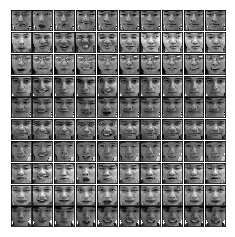

In [17]:
gs = gridspec.GridSpec(10, 10, top=.3, bottom=0., right=.3, left=0., hspace=0.1, wspace=0.)
plt.figure(figsize=(10, 10))
i = 0
for g in gs:
    ax = plt.subplot(g)
    ax.imshow(picdata[i].reshape(64, 64), cmap=plt.get_cmap('gray'))
    ax.set_xticks([])
    ax.set_yticks([])
    i = i + 1
plt.show()

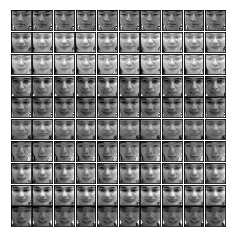

In [18]:

#ta code...
newpicdata = np.zeros(64*64)
for i in range(100):   
    newpic = np.zeros(64*64)
    for j in range(5):
        newpic = newpic + np.dot((picdata[i] - picmean), v[j]) * v[j]   
    newpic = newpic + picmean
    newpicdata = np.vstack( (newpicdata, newpic) )
newpicdata = newpicdata[1:,:]

gs = gridspec.GridSpec(10, 10, top=.3, bottom=0., right=.3, left=0., hspace=0.1, wspace=0.)
plt.figure(figsize=(10, 10))
i = 0
for g in gs:
    ax = plt.subplot(g)
    ax.imshow(newpicdata[i].reshape(64, 64), cmap=plt.get_cmap('gray'))
    ax.set_xticks([])
    ax.set_yticks([])
    i = i + 1
plt.show()

In [19]:
#find k
for k in range(1, 100):
    s = 0
    for i in range(100):
        newpic = np.zeros(64 * 64)
        for j in range(k):
            newpic = newpic + np.dot((picdata[i] - picmean), v[j]) * v[j]   
        newpic = newpic + picmean
        s = s + np.sum((newpic - picdata[i])**2)
    rmse = np.sqrt(s / 409600.) / 256.
    #print(rmse)
    if(rmse < 0.01):
        print(k)
        break

59
